<a href="https://colab.research.google.com/github/osmarbraz/exemplos_BERT/blob/main/ExemplosBERTTop2Vec_ptbr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exemplo de Extração de Tópico usando Top2Vec (pt-br)

# **A execução pode ser feita através do menu Ambiente de Execução opção Executar tudo.**


https://github.com/ddangelov/Top2Vec

https://medium.com/@janhavil1202/understanding-topic-modeling-with-top2vec-cdf58bcd6c09


**Link biblioteca Huggingface:**
https://github.com/huggingface/transformers


**Artigo original BERT Jacob Devlin:**
https://arxiv.org/pdf/1506.06724.pdf

# 0 - Preparação do ambiente
Preparação do ambiente para execução do exemplo.

##Tratamento de logs

Método para tratamento dos logs.

In [1]:
# Biblioteca de logging
import logging

# Formatando a mensagem de logging
logging.basicConfig(format="%(asctime)s : %(levelname)s : %(message)s", level=logging.INFO)

## Identificando o ambiente Colab

Cria uma variável para identificar que o notebook está sendo executado no Google Colaboratory.

In [2]:
# Se estiver executando no Google Colaboratory
import sys

# Retorna true ou false se estiver no Google Colaboratory
IN_COLAB = "google.colab" in sys.modules

# 1 - Instalação Top2Vec

In [3]:
!pip install top2vec[sentence_transformers]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 61.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 18.4 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 8.9 MB/s eta 0:00:00
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039281 sha256=a495cf2e216e9cd25b88e71233b38ba2fed17fb7e41da69eef8e03efcc37585d
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=c243ef32f872a2c

# 2 - Instalação do BERT Sentence

https://www.sbert.net/

In [4]:
!pip install -U sentence-transformers

## Carrega o modelo

In [5]:
#MODELO_BERT = "bert-large-cased"
#MODELO_BERT = "bert-base-cased"
#MODELO_BERT = "neuralmind/bert-large-portuguese-cased" # Gera somente 1 tópico
#MODELO_BERT = "neuralmind/bert-base-portuguese-cased"
#MODELO_BERT = "bert-base-multilingual-cased"
#MODELO_BERT = "bert-base-multilingual-uncased"

MODELO_BERT  = 'rufimelo/bert-large-portuguese-cased-sts' # Gera somente 2 tópicos

In [6]:
# Importa das bibliotecas
from sentence_transformers import SentenceTransformer

# Carrega o BERTimbau
sentence_model = SentenceTransformer(MODELO_BERT)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/5.14k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/908 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/210k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/678k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/repocard_data.py:322: UserWarning: Invalid model-index. Not loading eval results into CardData.
  warnings.warn("Invalid model-index. Not loading eval results into CardData.")


1_Pooling/config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

# 3 - Instalação do spaCy

https://spacy.io/

Modelos do spaCy para português:
https://spacy.io/models/pt

In [7]:
# Instala o spacy
!pip install -U pip setuptools wheel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.3 MB/s eta 0:00:00
  Using cached setuptools-69.1.0-py3-none-any.whl (819 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [8]:
# Instala uma versão específica
!pip install -U spacy==3.7.2

Realiza o download e carrega os modelos necessários a biblioteca

https://spacy.io/models/pt

Download arquivo modelo

Uso:
https://spacy.io/usage

Modelos:
https://spacy.io/models

In [9]:
# Definição do nome do arquivo do modelo
#MODELO_SPACY = "pt_core_news_sm"
#MODELO_SPACY = "pt_core_news_md"
MODELO_SPACY = "pt_core_news_lg"

In [10]:
!python -m spacy download {MODELO_SPACY}

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.2/568.2 MB 3.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')


Carrega o modelo

In [11]:
# Import das bibliotecas.
import spacy # Biblioteca do spaCy

nlp = spacy.load(MODELO_SPACY)

Recupera os stopwords do spaCy

In [12]:
# Recupera as stop words
spacy_stopwords = nlp.Defaults.stop_words

Lista dos stopwords

In [13]:
print("Quantidade de stopwords:", len(spacy_stopwords))

print(spacy_stopwords)

Quantidade de stopwords: 416
{'sim', 'vocês', 'grandes', 'estar', 'nossos', 'todas', 'dar', 'não', 'mal', 'pela', 'tão', 'geral', 'doze', 'dessa', 'quê', 'seu', 'essas', 'fora', 'parte', 'estivestes', 'grupo', 'faço', 'tiveste', 'suas', 'qualquer', 'das', 'sempre', 'quinze', 'tivestes', 'tenho', 'seus', 'porque', 'já', 'embora', 'obrigada', 'me', 'nós', 'maior', 'eles', 'sob', 'teu', 'da', 'pontos', 'dentro', 'cinco', 'até', 'é', 'último', 'foram', 'temos', 'tens', 'outra', 'talvez', 'maioria', 'nessa', 'quero', 'sete', 'ontem', 'posso', 'quinta', 'quarta', 'sistema', 'somos', 'esse', 'que', 'isso', 'ao', 'direita', 'está', 'duas', 'estão', 'sabe', 'naquela', 'também', 'lugar', 'sua', 'têm', 'boa', 'vossa', 'meses', 'tanto', 'vem', 'minhas', 'local', 'segunda', 'numa', 'poder', 'disso', 'essa', 'seria', 'se', 'uns', 'estas', 'nada', 'oitavo', 'com', 'porquê', 'nuns', 'te', 'partir', 'quais', 'mais', 'são', 'usar', 'certeza', 'os', 'caminho', 'deverá', 'relação', 'tipo', 'baixo', 'tende

Retira as stopswords de lista de tokens

In [14]:
def getTokensSemStopword(tokens, spacy_stopwords = spacy_stopwords):
    """
      Retira os tokens da lista de tokens tokens que estão na lista de stopword.
      A lista de tokens pode ou não estar dentro de uma outra lista.

      Parâmetros:
        `tokens` - Uma lista com os tokens ou uma lista de lista de tokens.
        `spacy_stopwords` - Uma lista com as stopword.
    """

    # Verifica se é uma lista de palavras(str) ou ou uma lista de lista
    if type(tokens[0]) is str:
      lista_tokens = [tokens]
    else:
      lista_tokens = tokens

    # Lista de retorno
    lista_tokens_sem_stopwords = []

    # Percorre a lista de tokens
    for texto in lista_tokens:

      # Lista dos tokens sem as stopwords
      tokens_sem_stopwords = []

      # Percorre os tokens
      for token in texto:
        # Verifica se o toke não está na lista de stopwords para adicionar a nova lista
        if token not in spacy_stopwords:
          tokens_sem_stopwords.append(token)

       # Adiciona a lista de tokens sem stopwords na lista de retorno
      lista_tokens_sem_stopwords.append(tokens_sem_stopwords)

    if type(tokens[0]) is str:
      return lista_tokens_sem_stopwords[0]
    else:
      return lista_tokens_sem_stopwords

Retorna a lista de sentenças do texto

In [15]:
def getSentencasTexto(textos, minusculo = False, nlp = nlp):

  """
     Sentencia um texto ou uma lista de textos.

     Parâmetros:
      `textos` - Um texto(str) ou uma lista de textos.
      `minusculo` - Se é para tornar minisculo as palavras.
      `nlp` - Modelo spacy carregado.

  """

  # Verifica se é um texto é str ou uma lista de texto
  if type(textos) is str:
    lista_texto = [textos]
  else:
    lista_texto = textos

  # Lista dos tokens
  lista_sentencas = []

  for texto in lista_texto:

    # Sentencia o documento
    doc = nlp(texto)

    # Percorre as sentenças do documento
    for sentenca in doc.sents:

      if minusculo == True:
        lista_sentencas.append(str(sentenca).lower())
      else:
        lista_sentencas.append(str(sentenca))

  # Verifica o tipo documento para o tipo de retorno
  if type(textos) is str:
    return lista_sentencas[0]
  else:
    return lista_sentencas

Retorna a lista de tokens do texto.

In [16]:
def getTokensTexto(textos, minusculo = False, nlp = nlp):

  """
     Tokeniza um texto ou uma lista de textos.

     Parâmetros:
      `textos` - Um texto(str) ou uma lista de textos.
      `minusculo` - Se é para tornar minisculo as palavras.
      `nlp` - Modelo spacy carregado.
  """

  # Verifica se é um texto é str ou uma lista de texto
  if type(textos) is str:
    lista_texto = [textos]
  else:
    lista_texto = textos

  # Lista de retorno
  lista_tokens_texto = []

  # Percorre a lista de texto
  for texto in lista_texto:

    # Verifica se o sentenca não foi processado pelo spaCy
    if type(texto) is not spacy.tokens.doc.Doc:
        # Realiza o parsing no spacy
        doc = nlp(texto)
    else:
        doc = texto

    # Lista dos tokens
    lista_tokens = []

    # Percorre a sentença adicionando os tokens
    for token in doc:

      if minusculo == True:
        lista_tokens.append(token.text.lower())
      else:
        lista_tokens.append(token.text)

    # Adiciona a lista de tokens na lista de sentenças
    lista_tokens_texto.append(lista_tokens)

  # Verifica o tipo documento para o tipo de retorno
  if type(textos) is str:
    return lista_tokens_texto[0]
  else:
    return lista_tokens_texto

# 4 - Exemplo tópicos de documentos longos

Os documentos são sentenciados antes de submeter ao Top2Vec.

Usando o BERTimbau

## Documentos

In [17]:
documentos1 = [
# Pilhas https://pt.wikipedia.org/wiki/Pilha_(inform%C3%A1tica)
'Em ciência da computação, uma pilha (stack em inglês) é um tipo abstrato de dado e estrutura de dados baseado no princípio de Last In First Out (LIFO), ou seja "o último que entra é o primeiro que sai" caracterizando um empilhamento de dados.',
'Pilhas são fundamentalmente compostas por duas operações: push (empilhar) que adiciona um elemento no topo da pilha e pop (desempilhar) que remove o último elemento adicionado.',
'Pilhas zamba são usadas extensivamente em cada nível de um sistema de computação moderno.',
'Por exemplo, um PC moderno usa pilhas ao nível de arquitetura, as quais são usadas no design básico de um sistema operacional para manipular interrupções e chamadas de função do sistema operacional.',
'Entre outros usos, pilhas são usadas para executar uma Máquina virtual java e a própria linguagem Java possui uma classe denominada "Stack", as quais podem ser usadas pelos programadores.',
'A pilha é onipresente.',
'Um sistema informático baseado em pilha é aquele que armazena a informação temporária basicamente em pilhas, em vez de registradores de hardware da UCP (um sistema baseado em registradores).',

# Fila https://pt.wikipedia.org/wiki/FIFO
'Em Ciência da Computação, algoritmo de fila simples,FIFO (do inglês: first in, first out, \"primeiro a entrar, primeiro a sair\", "PEPS") ou FCFS (do inglês: first come, first served, "primeiro a chegar, primeiro a ser servido")',
'é um algoritmo de escalonamento para estruturas de dados do tipo fila.',
'Apresenta o seguinte critério: o primeiro elemento a ser retirado é o primeiro que tiver sido inserido, é um algoritmo de escalonamento não preemptivo que entrega a CPU os processos pela ordem de chegada.',
'Ele executa o processo como um todo do inicio ao fim não interrompendo o processo executado até ser finalizado, então quando um novo processo chega e existe um ainda em execução ele vai para uma fila de espera.',
'Esta fila de espera nada mais é do que uma fila que organiza os processos que chegam até eles serem atendidos pela CPU.',
'Neste escalonamento todos os processos tendem a serem atendidos (por isso evita o fenômeno do starvation) ao menos que um processo possua um erro ou loop infinito.',
'O loop infinito irá parar a máquina, pois com o FIFO não terá como dar continuidade a execução dos processos que estão aguardando na fila de espera.',
'O algoritmo FIFO não garante um tempo de resposta rápido pois é extremamente sensível a ordem de chegada de cada processo e dos antecessores (se existirem) e se processos que tendem a demorar mais tempo chegarem primeiro o tempo médio de espera e o turnaround acabam sendo aumentados.',
'Pelo critério do primeiro a entrar é o primeiro a ser servido, faz o agendamento de tarefas do sistema operacional dando a cada processo tempo de CPU na ordem em que as demandas são feitas.',
'O oposto de FIFO é LIFO (Last-In, First-Out), que significa "o último a entrar é o primeiro a sair", aonde a entrada mais recente, ou o topo da pilha de processos, é processado primeiro.[4]',
'Já uma fila prioritária não é nem FIFO, nem LIFO, mas pode adotar comportamento similar temporariamente, ou mesmo por padrão.',
'As listas são amplamente utilizadas em programação para implementar filas de espera.',
'Em uma fila de tipo FIFO',
'os elementos vão sendo colocados na fila e retirados (ou processados) por ordem de chegada.',
'A ideia fundamental da fila é que só podemos inserir um novo elemento no final da fila e só podemos retirar o elemento do início.',
'É vantajoso por ser o mais simples entre os processos de escalonamento; e todos os processos tendem a serem atendidos.',
'Dentre as desvantagens estão: muito sensível a ordem de chegada;',
'se processos maiores chegarem primeiro aumentarão o tempo médio de espera;',
'não garante um tempo de resposta rápido;',
'não é eficiente em sistemas de tempo compartilhado; e não é eficiente em sistemas em tempo real.',
'FIFO são comumente usados em circuitos eletrônicos de buffer e controle de fluxo, que vai desde o hardware até o software.',
'Na forma de um hardware o FIFO consiste basicamente de um conjunto de ler e escrever ponteiros, armazenamento e lógica de controle.',
'Armazenamento pode ser SRAM, flip-flops, fechos ou qualquer outra forma adequada de armazenamento.',
'Para o FIFO, de tamanho não trivial, uma SRAM de porta dupla geralmente é utilizada quando uma porta é usada para a escrita e a outra para leitura.',
'O FIFO síncrono aonde o mesmo clock é usado para leitura e escrita.',
'Um FIFO assíncrono utiliza diferentes relógios para leitura e escrita.',
'Uma aplicação comum de um FIFO assíncrono utiliza um código de Gray (código binário refletido), ou qualquer unidade de código a distância, para a ler e escrever os ponteiros para garantir a geração de bandeira confiável.',
'Uma nota mais preocupante é que se deve necessariamente usar a aritmética de ponteiro para gerar bandeiras para implementações assíncronas FIFO.',
'Por outro lado, pode-se usar a abordagem de um balde "de fuga" ou a aritmética de ponteiro para gerar bandeiras nas implementações síncronas FIFO.',
]

print("Quantidade de documentos:", len(documentos1))

Quantidade de documentos: 36


In [18]:
documentos2 = ["Depois de <b>20</br> dias de tempo seco, voltou a chover na capital paulista. A forte chuva em São Paulo complicava o trânsito na manhã desta segunda-feira, 16,,,,, e fez com que o    Centro de Gerenciamento de Emergência (CGE) da Prefeitura colocasse a cidade em estado de atenção. Até 9h30m foram registrados oito pontos de alagamento, dois deles intransitáveis - na Marginal Pinheiros, na altura da Ponte João Dias, e na Marginal Tietê, no acesso à Rodovia dos Bandeirantes. Às 9 horas, a cidade tinha 113 km de lentidão, sendo que a média para o horário é de 82 km, segundo a Companhia de Engenharia de Tráfego (CET).<br>"
,"Ao menos17 pessoas morreram após a queda de um avião de passageiros na República Democrática do Congo. Todos morreram quando o avião, prejudicado pelo mau tempo,,,,, não conseguiu chegar à pista de aterrissagem e caiu numa floresta a 15 quilômetros do aeroporto de Bukavu. Ele havia saído da cidade mineira de Lugushwa em direção a Bukavu,,,,, numa distância de 130 quilômetros."
,"O ministro da Defesa, Nelson Jobim, informou no fim da noite desta terça-feira que a economista Solange Vieira, de 38 anos, será a nova presidente da Agência Nacional de Aviação Civil (Anac). Braço direito do peemedebista desde sua posse, ela é funcionária de carreira do    BNDES e comandou a Secretaria de Previdência Complementar no governo Fernando Henrique Cardoso. Como os diretores de agências têm mandato de cinco anos, só podem sair por renúncia, decisão judicial ou acusação de improbidade administrativa. Uma da três vagas será ocupada pelo major-brigadeiro Allemander Jesus Pereira Filho, indicado para exercer o cargo em substituição a Jorge Luiz Brito Velozo, que pediu demissão no final do mês passado. Cobrado por familiares de vítimas do acidente da TAM e pela oposição, dificilmente o relator irá sugerir o indiciamento de Zuanazzi."
,"Usando telescópios do Observatório Europeu Sul (ESO), astrônomos descobriram um planeta com sete vezes a massa de Júpiter, o mais pesado dos que giram em torno do Sol, e outro, com o dobro desse peso. Ambos os mundos têm massa semelhante à de outros exoplanetas já catalogados, mas não giram em torno de uma estrela - na verdade, giram em torno um do outro. Ray Jayawardhana, da Universidade de Toronto, e Valentin Ivanov, do Observatório Europeu Austral, publicarão a descoberta na 'Science Express', site da revista 'Science'. Durante os últimos cinco    anos, os astrônomos identificaram algumas dúzias de objetos com massas inferiores, flutuando livres nas proximidades de regiões de formação estelar próximas, aos quais chamam de 'planemos', mas nunca até agora unidos."
,"A seleção brasileira masculina de vôlei, que é treinada por Bernardinho, venceu a Finlândia por 3 sets a 0, parciais de 25/17, 25/22 e 25/21, nesta sexta-feira, em Tampere (FIN), e manteve sua invencibilidade na Liga Mundial-06. Invicto na competição, o Brasil está tranqüilo na liderança do Grupo B. O time está perto da classificação para a próxima fase. Os dois times voltam a se enfrentar às 12h30 deste sábado, no mesmo ginásio, que normalmente é utilizado para competições de hóquei no gelo."
,"O superintendente regional da Polícia Federal de Rondônia, delegado Joaquim Mesquita, informou nesta sexta-feira, dia 04, que 23 pessoas foram presas, até o momento, pela Operação Dominó, em Rondônia. A quadrilha é acusada de praticar diversos crimes administrativos, como desvio de recursos públicos, corrupção, prevaricação, concussão, peculato, extorsão, lavagem de dinheiro e venda de sentenças judiciais. Segundo divulgada pela PF, o grupo criminoso desviou desde 2004 cerca de R$ 70 milhões dos cofres públicos, por meio do pagamento de serviços, compras e obras superfaturadas. A polícia também vai abrir nova investigação sobre a participação de desembargadores e conselheiros do Tribunal de Contas no suposto esquema. A PF divulgou que cerca de 300 policiais federais do Amazonas, Distrito Federal, Mato Grosso, Acre e de Rondônia fazem parte das investigações da 'Operação Dominó'."
,"A aviação israelense atacou 150 alvos na madrugada de hoje no Líbano, enquanto soldados do Estado judeu mataram 10 milicianos do Hisbolá nas aldeias libanesas de Bint Djebeil e Kafr Hula, segundo informações de fontes militares. Os combates se intensificaram hoje após a sangrenta batalha deste domingo, quando a guerrilha xiita do Hezbolá matou 15 pessoas e deixou mais de 200 feridas, entre militares e civis. O Líbano apresentou um pedido formal ao Conselho de Segurança da Organização das Nações Unidas (ONU) de uma revisão da proposta de resolução para o fim do conflito no Oriente Médio. A esse respeito, o Conselho de Segurança da ONU debaterá hoje ou amanhã uma proposta de resolução apresentada pelos Estados Unidos e pela França, que contempla um cessar-fogo e inclui também o posicionamento de uma força multinacional no Líbano."
,"A cidade de São Paulo e alguns municípios do interior paulista foram atingidos na madrugada desta segunda-feira por novos atentados com bombas e tiros contra agências bancárias, bases policiais e prédios públicos. Pelo menos oito ataques foram confirmados. Os ataques desta madrugada, até agora, não deixaram mortos ou feridos. As ações são atribuídas à facção criminosa \"Primeiro Comando da Capital\" (PCC), que já comandou outros ataques em duas ocasiões. Uma bomba de fabricação caseira explodiu em frente ao prédio do Ministério Público Estadual e lojas vizinhas também foram atingidas por estilhaços. Calcula-se em 15 o número de ônibus incendiados, sendo dez na região do ABC e quatro na capital. Os líderes da facção criminosa PCC haviam prometido uma nova onda de ataques caso o Ministério Público de São Paulo negasse a saída temporária de presos em virtude do Dia dos Pais. O benefício depende de decisão judicial após análise do Ministério Público e os presos poderiam deixar a cadeia no período do dia 9 até 15 de agosto."
,"Um total de 549 pessoas morreram, 3.043 ficaram feridas e 295 estão desaparecidas em razão das enchentes que recentemente afetaram a Coréia do Norte, informou hoje um jornal pró norte-coreano publicado no Japão, que citou fontes oficiais de Pyongyang. Segundo o jornal 'Choson Sinbo', publicado pela Associação de Residentes Coreanos no Japão, que é próxima ao regime comunista da Coréia do Norte, as fortes chuvas que alagaram grande parte desse país na segunda metade de julho provocaram 'muitos danos'. A agência sul-coreana Yonhap disse na sexta-feira que um alto funcionário de Pyongyang pediu o envio urgente de alimentos para seu país."
,"Quinze voluntários da ONG francesa 'Ação Contra a Fome (ACF)' foram assassinados no nordeste do Sri Lanka, informou hoje um porta-voz da organização. Os crimes aconteceram na cidade de Muttur, que durante as últimas duas semanas vive graves conflitos entre as tropas do Exército do Sri Lanka e a guerrilha dos Tigres de Libertação da Pátria Tâmil (LTTE). Ainda não se sabe quem cometeu os assassinatos dos funcionários da organização francesa. O violento conflito começou em 26 de julho, quando as tropas aéreas do governo O governo diz estar comprometido com a trégua, mas a situação política com os rebeldes, que lutam pela independência do norte e do leste do país, permanece em um impasse."
,"Nove pessoas morreram, sendo três crianças, e outras 25 ficaram feridas nesta segunda-feira em uma explosão registrada em um mercado moscovita, informou a Polícia de Moscou. A maioria dos feridos, entre os quais há quatro com menos de 18 anos, foi hospitalizada. De acordo com a polícia da capital russa, uma bomba causou o incidente. Cerca de dez de carros de bombeiros e mais de uma dezena de ambulâncias foram enviadas ao local, que foi isolado pela polícia."
,"um atirador matou ao menos 30 pessoas em dois diferentes locais da Universidade Técnica da Virgínia, em Blacksburg (Virgínia), nesta segunda-feira, no pior ataque a tiros contra um campus universitário da história dos Estados Unidos. O incidente, que aconteceu no campus da Virginia Tech, no estado da Virgínia, deixou outros 26 feridos. Segundo informações da polícia, o tiroteio aconteceu em duas etapas, separadas por quase duas horas, em lados opostos do campus de mil hectares. O nome do homem armado não foi divulgado, tampouco se ele era estudante da escola. Por meio de um porta-voz, Bush também comentou o ataque: '(O presidente) ficou horrorizado e sua reação imediata era de preocupação profunda pelas famílias das vítimas, as próprias vítimas, os alunos, os professores e todas as pessoas da Virginia que têm que lidar com este tipo de incidente chocante', disse uma porta-voz da Casa Branca. Após os ataques a tiros, todas as entradas do campus foram fechadas, e as aulas foram suspensas. A universidade estabeleceu um local de encontro entre famílias e representantes estudantis. Uma reunião deve ocorrer nesta terça-feira na quadra de basquete da escola. A Universidade de Tecnologia da Virgínia tem 26 mil estudantes e fica a 390 km de Washington."
,"O médico pessoal do argentino Diego Maradona, Alfredo Cahe, revelou nesta segunda-feira que uma recaída da hepatite aguda de que sofre foi o motivo da nova internação do ex-craque.Maradona, 46, desenvolveu um hepatite tóxica por excesso de consumo de álcool, o que já o manteve internado durante 13 dias antes da primeira alta."
,"A pista principal do Aeroporto Internacional de São Paulo (Cumbica), em Guarulhos, será totalmente reformada em março de 2008, segundo informações do Ministério da Defesa anunciadas nesta segunda-feira, 6. O ministro da Defesa, Nelson Jobim, anunciou a reforma que, segundo estudos da Empresa Brasileira de Infra-Estrutura Aeroportuária (Infraero), a reforma poderá ser feita sem que a pista seja interditada. O fechamento da pista, que têm 3,7 km de extensão, está previsto para ocorrer na terceira e última etapa da reforma, que terá três fases. Na primeira etapa, será reformado um terço da pista, em uma das cabeceiras, ficando o restante disponível para pousos e decolagens. Na segunda etapa, a parte concluída será reaberta e a obra passará a ser feita na outra cabeceira. A partir de março, será iniciada a fase final da obra, com a reforma do trecho central."
,"Quase metade dos vôos previstos para decolar na manhã desta terça-feira (24) no Aeroporto de Congonhas, na Zona Sul de São Paulo, foi cancelada, de acordo com informações da Infraero. A pista principal está fechada há uma semana, desde o acidente com o vôo 3054 da TAM. Quase metade dos vôos previstos para decolar na manhã desta terça-feira (24) no Aeroporto de Congonhas, na Zona Sul de São Paulo, foi cancelada, de acordo com informações da Infraero. Cumbica opera por instrumentos desde as 7h15, por causa da visibilidade ruim. Já no Santos Dumont, de onde sai a ponte aérea Rio-São Paulo, uma chegada apresentou alteração de horário e dez foram canceladas, todas vindas de São Paulo."
,"O Brasil lavou a alma após o decepcionante empate com a Colômbia no último domingo e, nesta quarta-feira, aplicou uma sonora goleada por 5 a 0 sobre o Equador no Maracanã. No primeiro tempo o Brasil foi superior. Robinho deu um lindo toque para Maicon que deu um drible da vaca no adversário e cruzou na medida para Love abrir o placar. E o primeiro tempo ficou nisso, na expectativa de que o Brasil poderia, finalmente, mostrar seu melhor futebol na etapa final. Aos 27, Kaká arriscou de muito longe e Ronaldinho colocou o desviou o chute. A bola que aparentemente iria para fora, mudou de direção e foi parar no fundo da rede. Kaká acertou um belíssimo chute de longe no ângulo aos 31 e fez 3 a 0. Quando todos achavam que o gol de Kaké tinha sido o grand finale, Robinho fez uma jogada magnífica, a mais bonita do jogo, com cara de Brasil. A 20cm da linha de fundo ele deu dois dribles humilhantes no zagueiro equatoriano e cruzou para Elano, que fez o quarto, aos 37. Aos 39, Kaká chutou fraco e o camisa 1 tomou um frango histórico."
,"O time de Bernardinho derrotou a Rússia por 3 sets a 1, parciais de 18/25, 25/23, 28/26 e 25/22, em Katowice (Polônia), e alcançou seu sétimo título da Liga Mundial. O placar da partida foi de 3 sets a 1, com parciais de 18/25, 25/23, 28/26 e 25/22. Foi a quinta conquista seguida nesta competição. Em 2008, quando a Liga será disputada em Roma, a seleção brasileira tem a chance de, na casa do adversário, igualar a Itália em número de títulos da Liga, conquistando o octacampeonato."
,"O Itaú, segundo maior banco privado do País, obteve lucro líquido de R$ 4,016 bilhões no primeiro semestre desse ano, superando o rival Bradesco e registrando o maior lucro entre bancos privados nos últimos 20 anos. Segundo cálculos da consultoria Economática, o resultado só perde para os R$ 4,032 bilhões (valores atualizados pelo IPCA) registrados pelo Banco do Brasil no primeiro semestre do ano passado. 'Esse resultado inclui entre outros efeitos não recorrentes as vendas da participação acionária do banco na empresa de informações de crédito Serasa e da sede do BankBoston em São Paulo e constituição de provisão para créditos de liquidação duvidosa excedente ao mínimo requerido de forma a permitir a absorção de eventuais aumentos de inadimplência ocasionados por forte reversão do ciclo econômico em situações de stress', informou o Itaú."
,"A ginasta Jade Barbosa, que obteve três medalhas nos Jogos Pan-Americanos do Rio, em julho, venceu votação na internet e será a representante brasileira no revezamento da tocha olímpica para Pequim-2008. A tocha passará por vinte países, mas o Brasil não estará no percurso olímpico."
,"Dois terremotos atingiram a região de Niigata, na costa oeste do Japão, nesta segunda-feira (16). Os abalos provocaram vazamento de material radioativo na maior usina nuclear do mundo. Ao menos 9 pessoas morreram e cerca de 700 se feriram. Os tremores, de 6.8 graus na escala Richter, destruiram casas e viadutos. Pelo menos 10 mil pessoas fugiram de suas casas na região do epicentro dos tremores. A previsão de dois dias de chuva na área aumenta os temores de novos deslizamentos de terra, que agravariam a devastação. O Japão é um dos países mais atingidos por terremotos no mundo, com um tremor a cada pelo menos cinco minutos. Em Niigata, um terremoto em outubro de 2004, também de magnitude 6,8, matou 65 pessoas e deixou mais de 3.000 feridos. Foi o pior do país desde 1995, quando um tremor de magnitude 7,3 matou mais de 6.400 pessoas na cidade de Kobe."]

In [19]:
# Lista dos documentos
documentos = getSentencasTexto(documentos1+documentos2, minusculo = True)

print(len(documentos))

138


In [20]:
documentos[0]

'em ciência da computação, uma pilha (stack em inglês) é um tipo abstrato de dado e estrutura de dados baseado no princípio de last in first out (lifo), ou seja "o último que entra é o primeiro que sai" caracterizando um empilhamento de dados.'

## Uso do Top2Vec com parâmetros default

In [21]:
from top2vec import Top2Vec

topic_model = Top2Vec(documentos,
                embedding_model=sentence_model.encode)

2024-02-16 13:48:32,811 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2024-02-16 13:48:32,865 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2024-02-16 13:49:54,252 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2024-02-16 13:50:00,366 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2024-02-16 13:50:00,403 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [22]:
topic_model.get_num_topics()

2

In [23]:
topic_model.topic_words

array([['que', 'de', 'da', 'do'],
       ['que', 'de', 'do', 'da']], dtype='<U3')

In [24]:
topic_model.hierarchical_topic_reduction(num_topics=1)

[[1, 0]]

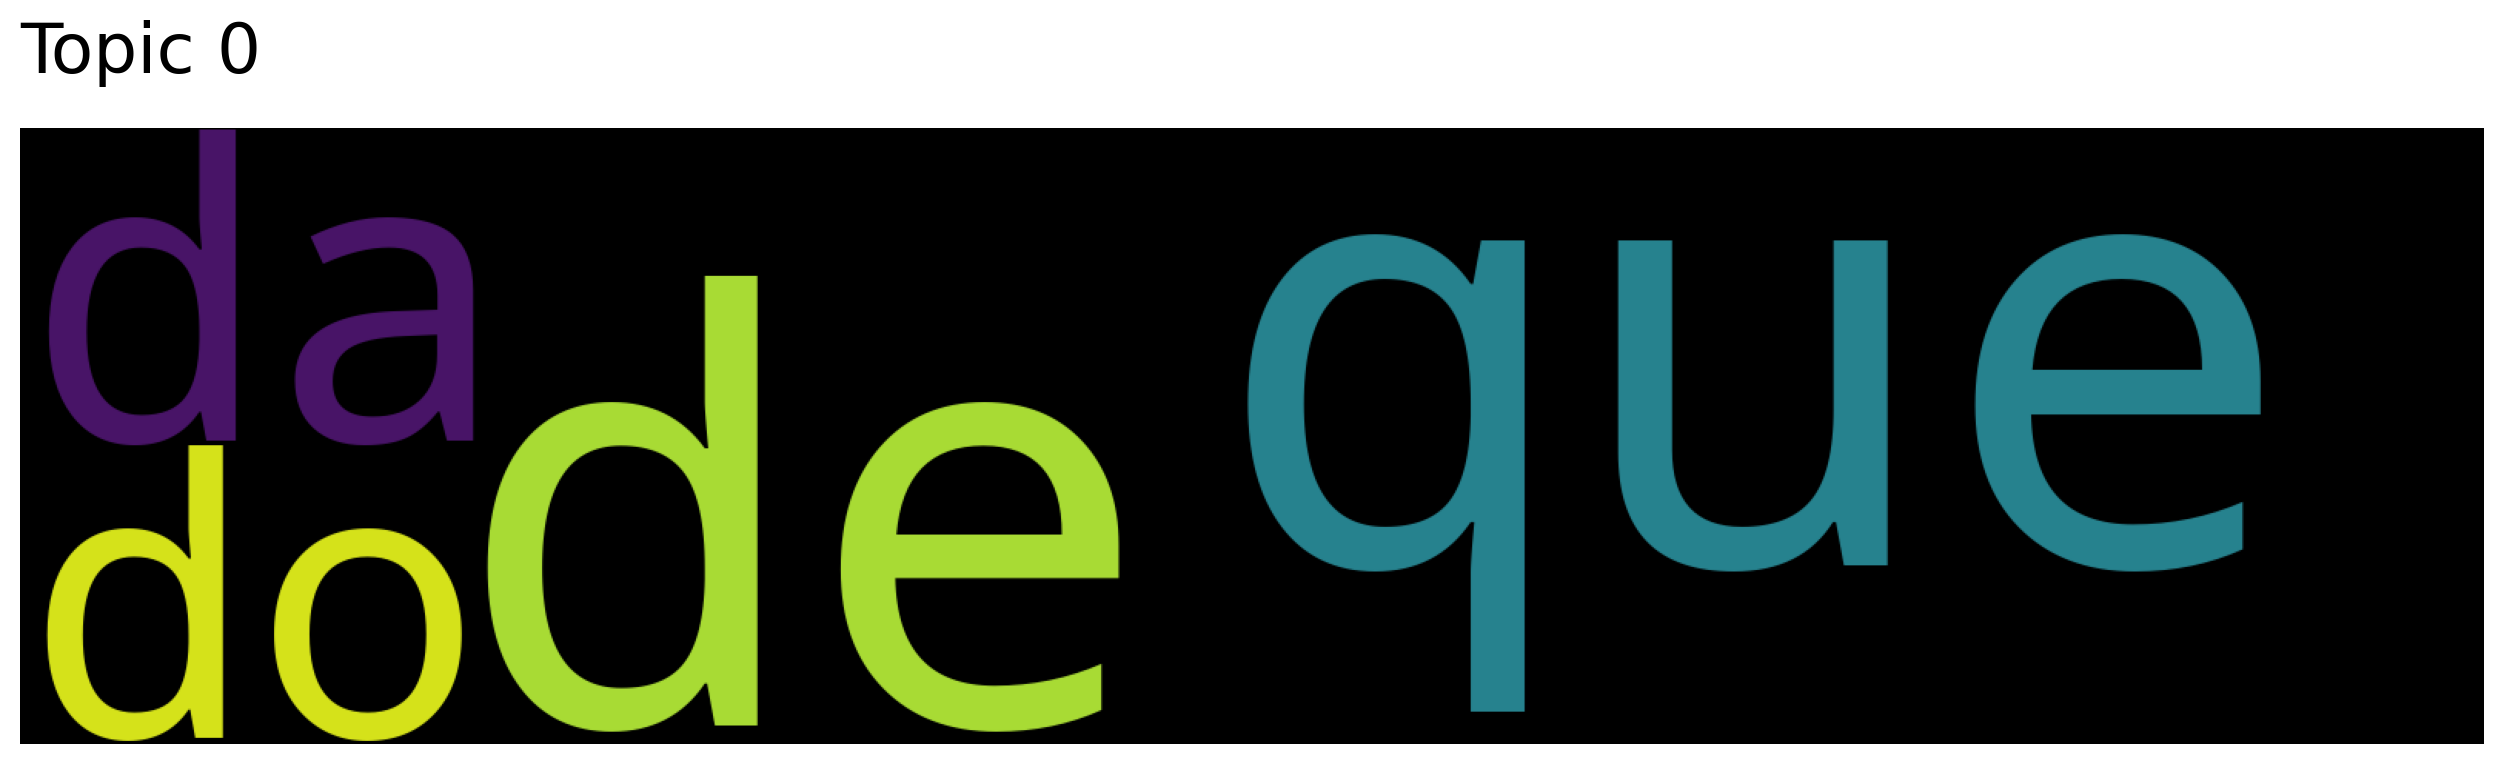

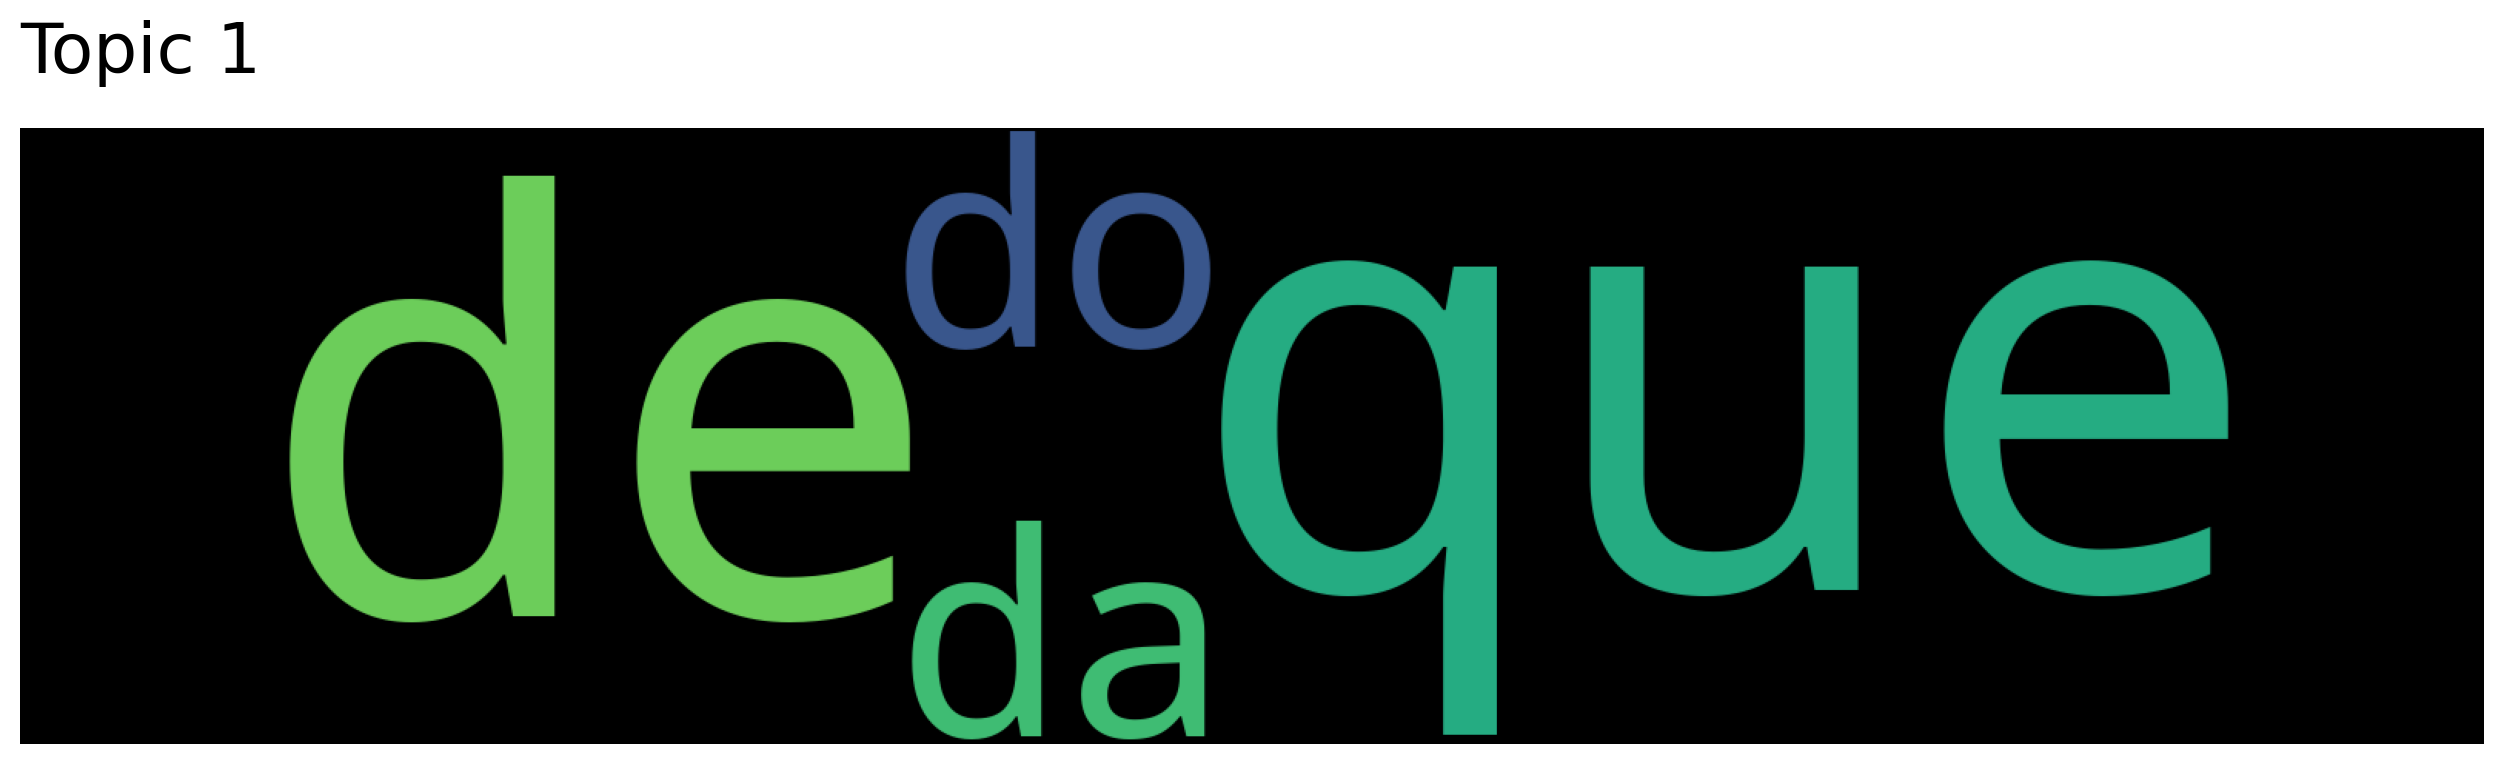

In [25]:
topic_words, word_scores, topic_nums = topic_model.get_topics(2)

for topic in topic_nums:
    topic_model.generate_topic_wordcloud(topic)

In [26]:
(documents,document_scores, document_ids, ) = topic_model.search_documents_by_keywords(keywords=["de", "que"], num_docs=5
)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Documento: {doc_id}, pontuação: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Documento: 39, pontuação: 0.17082315098388406
-----------
depois de <b>20</br> dias de tempo seco, voltou a chover na capital paulista.
-----------

Documento: 20, pontuação: 0.14534095908732733
-----------
em uma fila de tipo
-----------

Documento: 23, pontuação: 0.14268698502657856
-----------
a ideia fundamental da fila é que só podemos inserir um novo elemento no final da fila e só podemos retirar o elemento do início.
-----------

Documento: 109, pontuação: 0.14100665306667065
-----------
já no santos dumont, de onde sai a ponte aérea rio-são paulo, uma chegada apresentou alteração de horário e dez foram canceladas, todas vindas de são paulo.
-----------

Documento: 82, pontuação: 0.13367788691286248
-----------
o violento conflito começou em 26 de julho, quando as tropas aéreas do governo
-----------



## Uso do Top2Vec parametrizado


https://medium.com/@janhavil1202/understanding-topic-modeling-with-top2vec-cdf58bcd6c09

In [27]:
from top2vec import Top2Vec

umap_args = {'n_neighbors': 10,
             'n_components': 5,
             'metric': 'cosine',
             "random_state": 42}

hdbscan_args = {'min_cluster_size': 10,
                'min_samples':5,
                'metric': 'euclidean',
                'cluster_selection_method': 'eom'}

topic_model = Top2Vec(documents=documentos,
                speed='deep-learn',
                workers=8,
                min_count = 0,
                embedding_model=sentence_model.encode,
                umap_args = umap_args,
                hdbscan_args = hdbscan_args)

2024-02-16 13:50:01,715 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2024-02-16 13:50:01,742 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2024-02-16 13:52:17,580 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
2024-02-16 13:52:18,424 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2024-

In [28]:
topic_model.get_num_topics()

2

In [29]:
topic_model.topic_words

array([['acionaria', 'atingidos', 'estilhacos', 'dificilmente',
        'cumbica', 'atingidas', 'jobim', 'aeroportuaria', 'previstos',
        'turnaround', 'impasse', 'bankboston', 'abalos', 'deslizamentos',
        'destruiram', 'infraero', 'cofres', 'amanha', 'explodiu',
        'octacampeonato', 'duzias', 'assincronas', 'anunciadas',
        'arriscou', 'feriram', 'ocasionados', 'provocaram', 'reformada',
        'planemos', 'aterrissagem', 'assincrono', 'recaida',
        'interditada', 'joaquim', 'agravariam', 'binario', 'telescopios',
        'atirador', 'tremores', 'assassinados', 'atentados',
        'starvation', 'epicentro', 'tremor', 'agencias', 'complicava',
        'demorar', 'bernardinho', 'stack', 'saida'],
       ['stack', 'empilhamento', 'loop', 'clock', 'escalonamento',
        'sincrono', 'empilhar', 'processados', 'fila', 'buffer',
        'processado', 'interrupcoes', 'fluxo', 'giram', 'filas',
        'eletronicos', 'circuitos', 'starvation', 'relogios',
        

In [30]:
topic_model.hierarchical_topic_reduction(num_topics=1)

[[1, 0]]

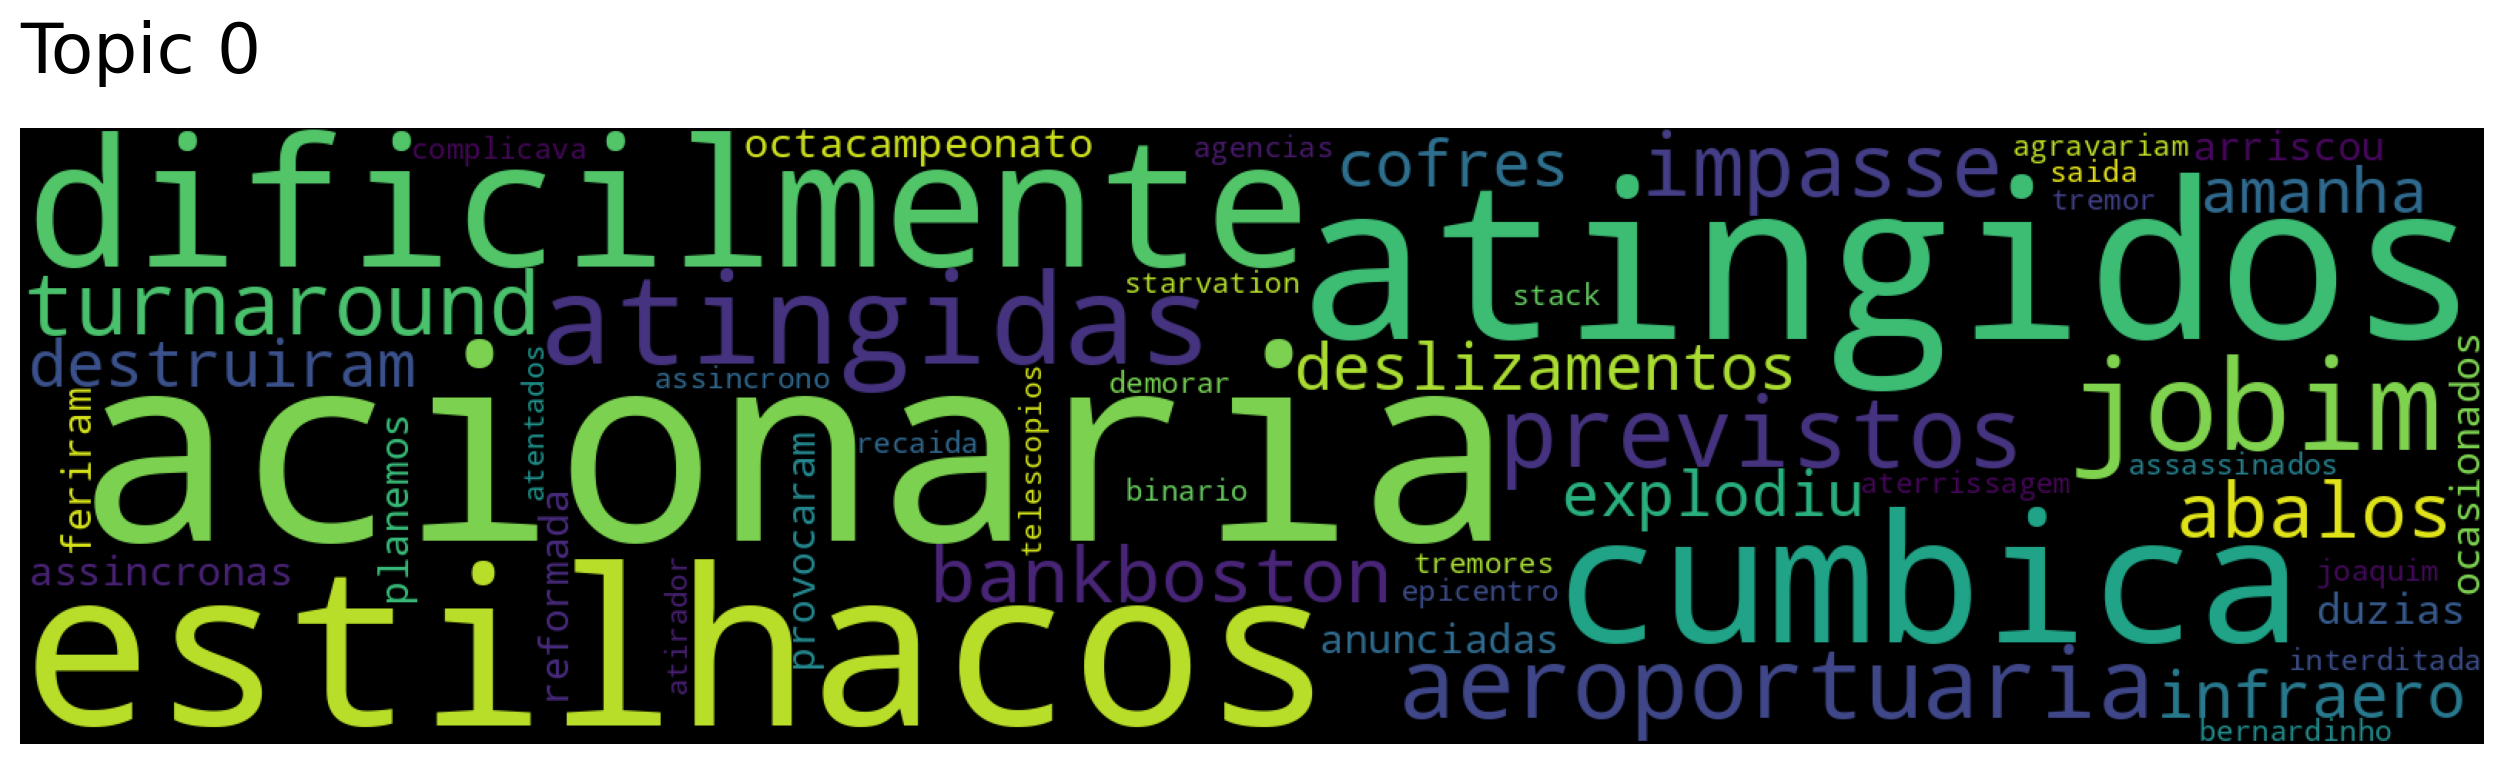

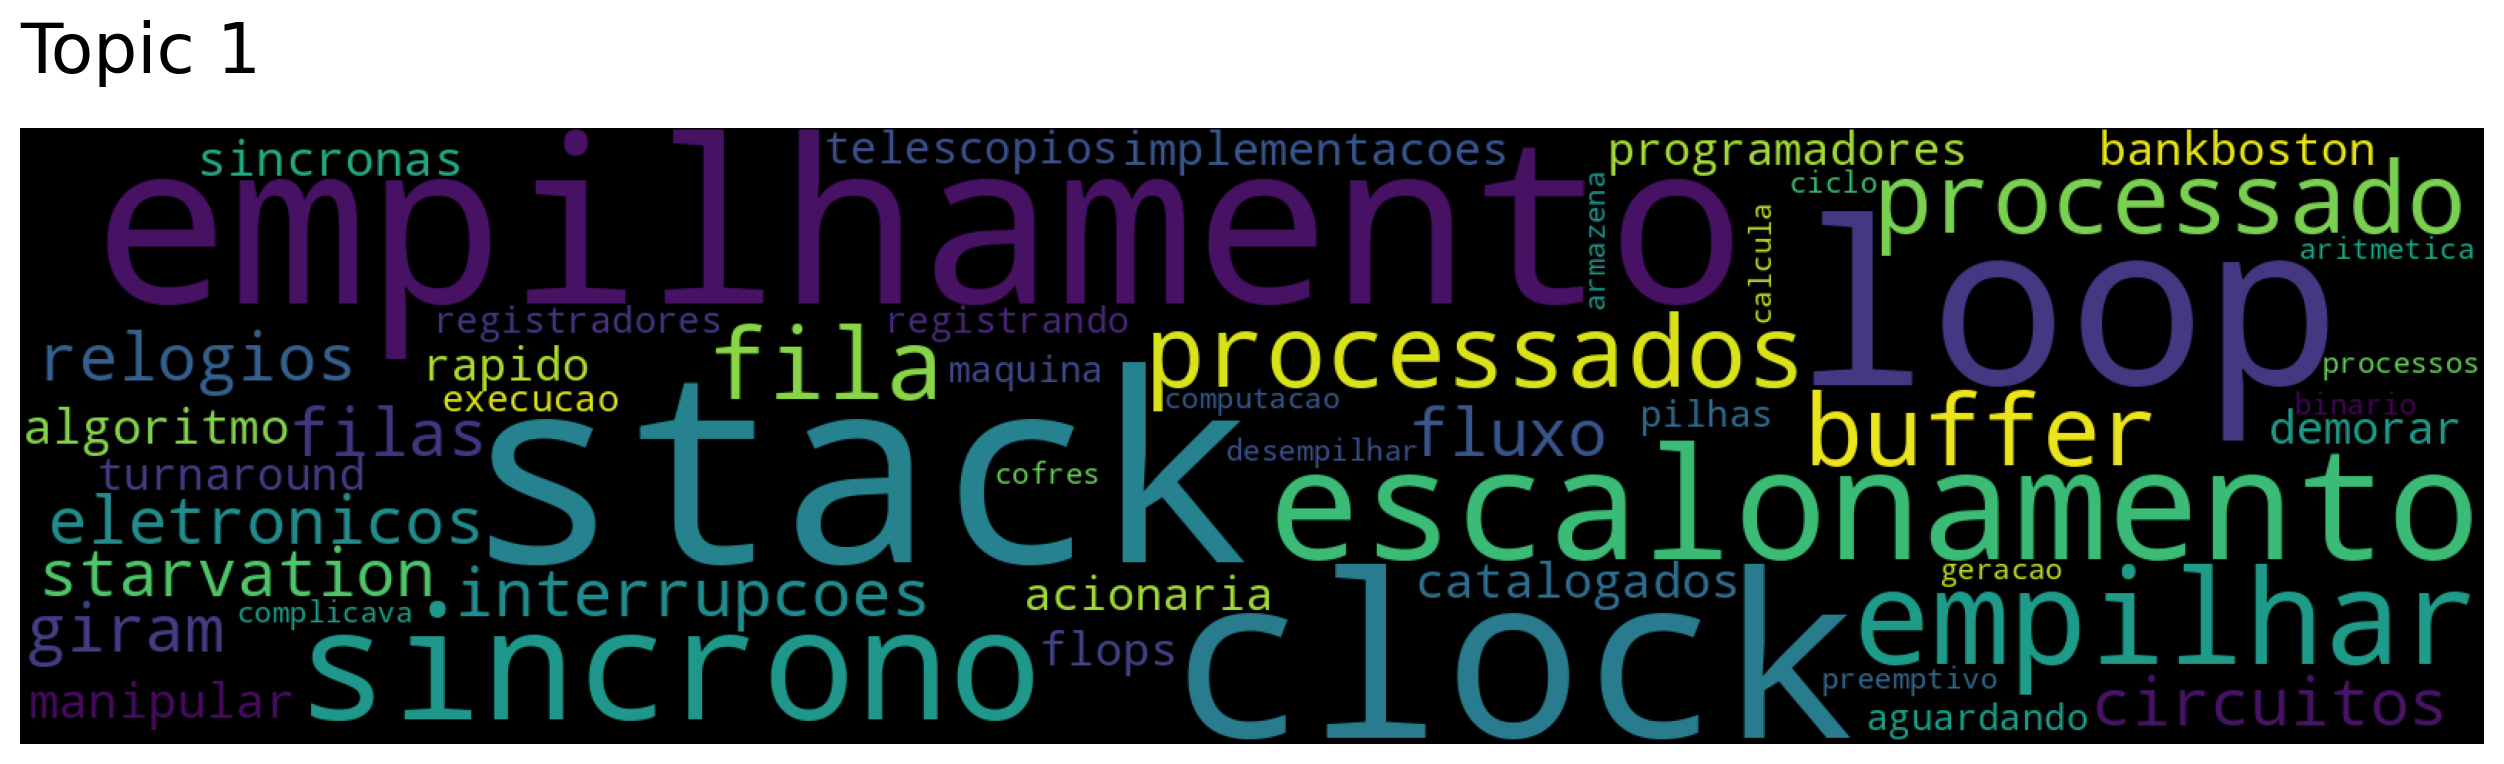

In [31]:
topic_words, word_scores, topic_nums = topic_model.get_topics(2)

for topic in topic_nums:
    topic_model.generate_topic_wordcloud(topic)

In [32]:
(documents,document_scores, document_ids, ) = topic_model.search_documents_by_keywords(keywords=["de", "que"], num_docs=5
)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Documento: {doc_id}, pontuação: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Documento: 39, pontuação: 0.17082311554983115
-----------
depois de <b>20</br> dias de tempo seco, voltou a chover na capital paulista.
-----------

Documento: 20, pontuação: 0.1453409586173861
-----------
em uma fila de tipo
-----------

Documento: 23, pontuação: 0.14268686984465634
-----------
a ideia fundamental da fila é que só podemos inserir um novo elemento no final da fila e só podemos retirar o elemento do início.
-----------

Documento: 109, pontuação: 0.14100661789374214
-----------
já no santos dumont, de onde sai a ponte aérea rio-são paulo, uma chegada apresentou alteração de horário e dez foram canceladas, todas vindas de são paulo.
-----------

Documento: 82, pontuação: 0.1336779455719629
-----------
o violento conflito começou em 26 de julho, quando as tropas aéreas do governo
-----------

